In [5]:
# copyright 2022 Christian Forssén
# by Christian Forssén
# For detailed reasoning, see Data Analysis: A Bayesian Tutorial (2E) by D. S. Sivia with J. Skilling (ISBN 978-0-19-856832-2).

import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=999)         # for reproducibility
pHtrue=0.6 # biased coin
flips=rng.random(2**13) # simulates 4096 coin flips
heads=flips<pHtrue              # boolean array, heads[i]=True if flip i is heads

In [9]:
# copyright 2022 Christian Forssén
# by Christian Forssén
# For detailed reasoning, see Data Analysis: A Bayesian Tutorial (2E) by D. S. Sivia with J. Skilling (ISBN 978-0-19-856832-2).

def prior(pH):
    "returns an array of prior probability densities"
    p=np.zeros_like(pH)
    p[(0<=pH)&(pH<=1)]=1      # allowed range: 0<=pH<=1
    return p                # uniform prior
def likelihood(pH,data):
    "returns an array of likelihood probability densities"
    N = len(data)
    no_of_heads = sum(data)
    no_of_tails = N - no_of_heads
    return pH**no_of_heads * (1-pH)**no_of_tails
def posterior(pH,data):
    "returns an array of (normalized) posterior probability densities"
    p=prior(pH)*likelihood(pH,data)
    norm=np.trapz(p,pH)
    return p/norm

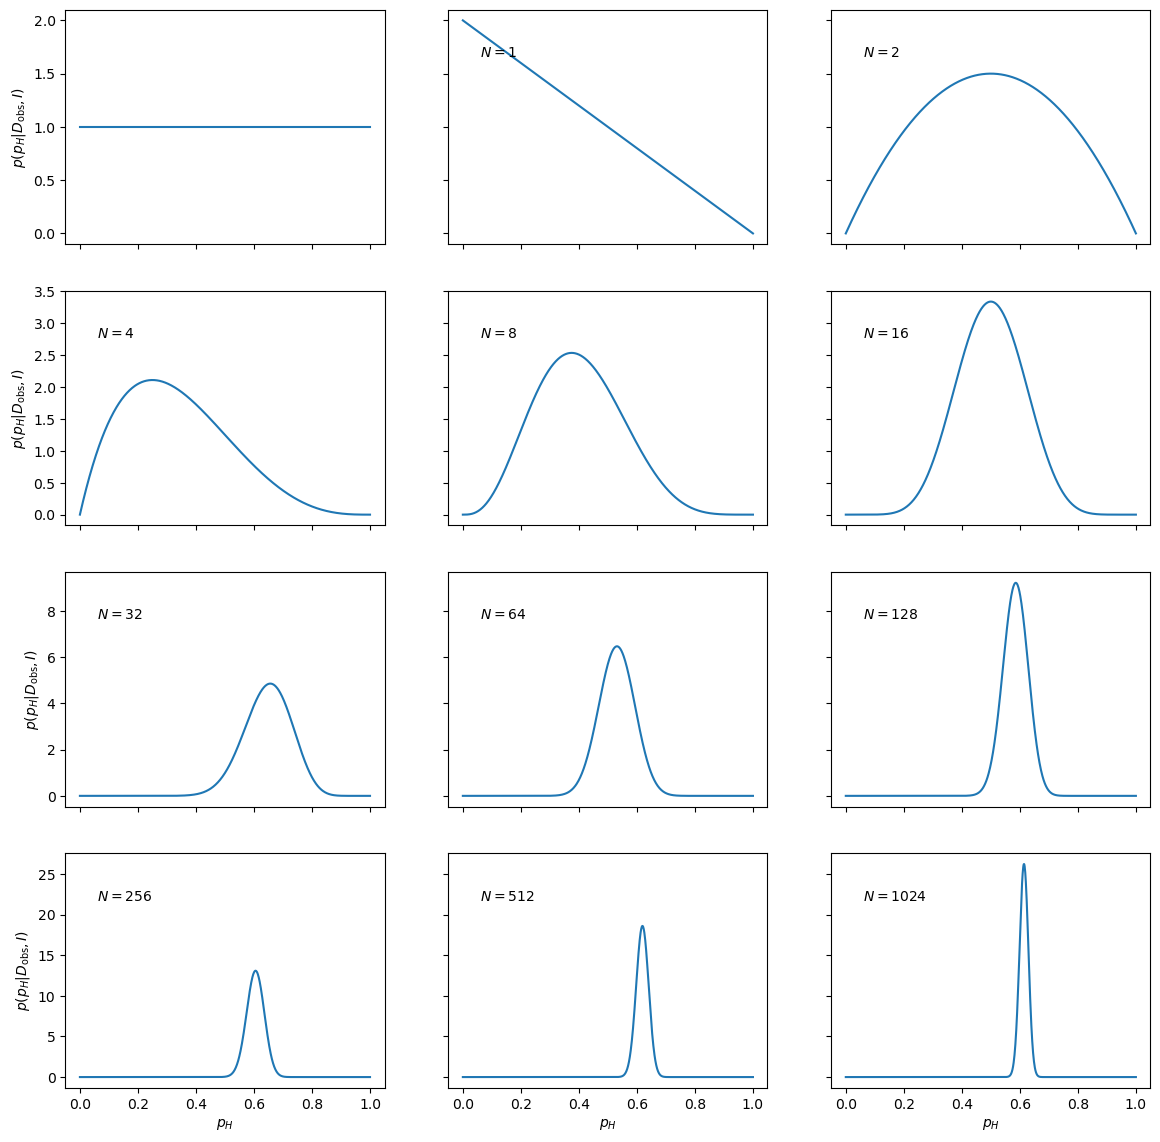

In [16]:
# copyright 2022 Christian Forssén
# by Christian Forssén
# For detailed reasoning, see Data Analysis: A Bayesian Tutorial (2E) by D. S. Sivia with J. Skilling (ISBN 978-0-19-856832-2).

pH=np.linspace(0,1,1000)
fig, axs = plt.subplots(nrows=4,ncols=3,sharex=True,sharey='row',figsize=(14,14))
axs_vec=np.reshape(axs,-1)
axs_vec[0].plot(pH,prior(pH))
for ndouble in range(11):
    ax=axs_vec[1+ndouble]
    ax.plot(pH,posterior(pH,heads[:2**ndouble]))
    ax.text(0.1, 0.8, '$N={0}$'.format(2**ndouble), transform=ax.transAxes)
for row in range(4): axs[row,0].set_ylabel('$p(p_H|D_\mathrm{obs},I)$')
for col in range(3): axs[-1,col].set_xlabel('$p_H$')


<h3>Varying the number of data points: 
When increasins to 8192 (2^13),Iy observe a narrower posterior distribution. This indicates higher certainty in the estimated coin bias.</h3
>

<h3>below with a coin bias set at 0.75, the posterior distribution quickly converges towards this value as we observe more heads in our simulated flips. After 64 to 128 flips, the posterior exhibits a sharp peak at 0.75, denoting a strong conviction about the accuracy of this parameter. Increasing the number of flips to 2048 goes a step beyond, making it a leaner and narrower posterior curve. On the contrary, the fewer flips of 512 make the curve wider and even shorter, connoting a feeling of more anxiety. Also, through the different shapes of prior functions, we checked both a uniform prior with a Gaussian prior centered at 0.5. Though, both priors eventually go to 0.75, a Gaussian prior is still in control at 0.5, with such a result as a wider posterior. In addition, when all the data are put in at once, a single posterior results that summarizes evidence played in total rather than portrays the dynamic learning process. This analysis underscores the importance of prior beliefs, sample size, and updating strategies in Bayesian inference. This version maintains the essential insights while being brief and to the pointt.</h3>

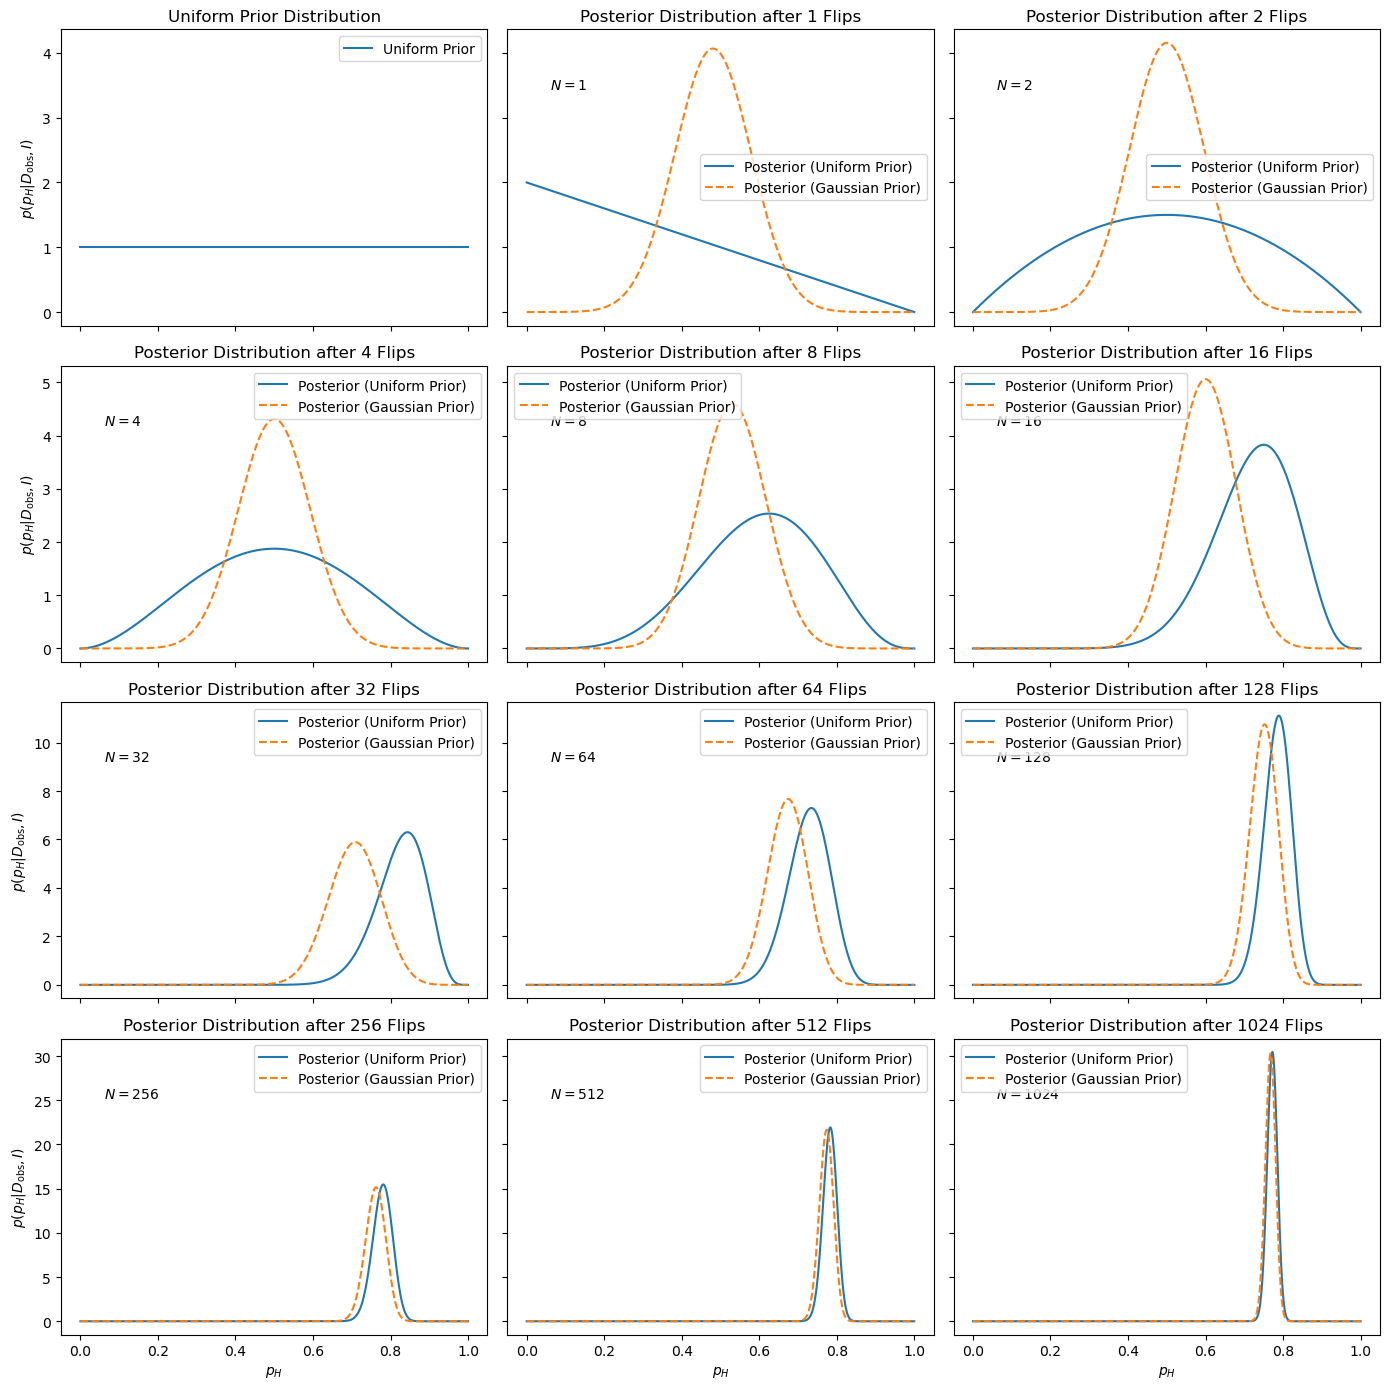

In [19]:
# copyright 2022 Christian Forssén
# by Christian Forssén
# For detailed reasoning, see Data Analysis: A Bayesian Tutorial (2E) by D. S. Sivia with J. Skilling (ISBN 978-0-19-856832-2).

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
rng = np.random.default_rng(seed=999)

# Change the choice of coin bias here (valid range: 0 to 1)
pHtrue = 0.75  # Example of a heavily biased coin

# Simulate coin flips
flips = rng.random(2**13)  # Simulates 4096 coin flips
heads = flips < pHtrue

def uniform_prior(pH):
    """Returns an array of uniform prior probability densities."""
    p = np.zeros_like(pH)
    p[(0 <= pH) & (pH <= 1)] = 1
    return p

def gaussian_prior(pH, mean=0.5, std_dev=0.1):
    """Returns an array of Gaussian prior probability densities."""
    return np.exp(-((pH - mean)**2) / (2 * std_dev**2)) / (std_dev * np.sqrt(2 * np.pi))

def likelihood(pH, data):
    """Returns an array of likelihood probability densities."""
    N = len(data)
    no_of_heads = sum(data)
    no_of_tails = N - no_of_heads
    return pH**no_of_heads * (1 - pH)**no_of_tails

def posterior(prior_func, pH, data):
    """Returns an array of (normalized) posterior probability densities."""
    p = prior_func(pH) * likelihood(pH, data)
    norm = np.trapz(p, pH)
    return p / norm

# Define the parameter space for pH
pH = np.linspace(0, 1, 1000)

# Create subplots for visualization
fig, axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey='row', figsize=(14, 14))
axs_vec = np.reshape(axs, -1)

# Plot the prior distribution using uniform prior
axs_vec[0].plot(pH, uniform_prior(pH), label='Uniform Prior')
axs_vec[0].set_title('Uniform Prior Distribution')
axs_vec[0].legend()

# Varying the number of data points from 1 to 2048 (2^ndouble)
for ndouble in range(11):
    ax = axs_vec[1 + ndouble]
    
    # Calculate posterior using uniform prior
    post_uniform = posterior(uniform_prior, pH, heads[:2**ndouble])
    
    ax.plot(pH, post_uniform, label='Posterior (Uniform Prior)')
    
    # Calculate posterior using Gaussian prior
    post_gaussian = posterior(gaussian_prior, pH, heads[:2**ndouble])
    
    ax.plot(pH, post_gaussian, label='Posterior (Gaussian Prior)', linestyle='--')
    
    ax.text(0.1, 0.8, '$N={0}$'.format(2**ndouble), transform=ax.transAxes)
    ax.set_title(f'Posterior Distribution after {2**ndouble} Flips')
    
# Set labels for axes
for row in range(4):
    axs[row, 0].set_ylabel('$p(p_H|D_\mathrm{obs},I)$')
for col in range(3):
    axs[-1, col].set_xlabel('$p_H$')

# Add legends to each subplot
for ax in axs_vec[1:]:
    ax.legend()

plt.tight_layout()
plt.show()


<h3>we can analyze how different priors affect the posterior estimates and how increasing data points leads to more precise estimates.
The dashed lines represent the Gaussian prior's effect compared to the solid lines from the uniform prior. </h3>